# Hexbin
Hexbin is a data visualization method simular to heatmap, like heatmap, it uses color representing of number of data within each section. But instead of each of these sections being a rectangle, they are hexagons.

Hexbin is usually used where heatmap is used. But the difference is that when we have a lot of data, hexbins tend to be more visually appealing.

For our data, which is **all the earthquakes happened in the world**, this is very suitable. We can have a hexbin of places that earthquakes most and least occured in the history.

## Scatter plot
The scatter plot for this project is not presented as a plotting method. But more of a way for viewer to understand long/lat of our hexbin.

As a CS major student, I have no idea of long/lats and where they actually are. So I used scatter method and another dataset to plot each country and where they are in our long/lat system (as the earthquake positions were defined in long/lat).

## Importing libraries and data
We're gonna need pandas and matplitlib.pyplot for this representation. We import them as pd and plt as its a norm in python community.

Then we read our csv data files into pandas dataframes with read_csv method.

In [321]:
import pandas as pd
import matplotlib.pyplot as plt

eq_df = pd.read_csv("earthquake.csv")
ll_df = pd.read_csv("country-latitude.csv")

## Preparing the data
We already have imported the data from our csv files into data frames. So now we convert them to a usable format. First, we have to convert long/lat columns of each data to numeric data. If theres one cell that has non-numeric data, our call to **any** plot functions would fail with a lot of nasty errors.

Then, we drop all the rows where the columns that we use are null/NaN inside them. For eq_df, we use only Latitude and Longitude columns. But for ll_df, we use longitude, latitude and country.

We do these for both of our dataframes

In [322]:
eq_df.Latitude = pd.to_numeric(eq_df.Latitude)
eq_df.Longitude = pd.to_numeric(eq_df.Longitude)

eq_df = eq_df.dropna(subset=["Latitude", "Longitude"])
eq_df

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.2460,145.6160,Earthquake,131.60,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.8630,127.3520,Earthquake,80.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.5790,-173.9720,Earthquake,20.00,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.0760,-23.5570,Earthquake,15.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.9380,126.4270,Earthquake,15.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23407,12/28/2016,08:22:12,38.3917,-118.8941,Earthquake,12.30,1.2,40.0,5.6,ML,...,18.0,42.47,0.120,NaN,0.1898,NN00570710,NN,NN,NN,Reviewed
23408,12/28/2016,09:13:47,38.3777,-118.8957,Earthquake,8.80,2.0,33.0,5.5,ML,...,18.0,48.58,0.129,NaN,0.2187,NN00570744,NN,NN,NN,Reviewed
23409,12/28/2016,12:38:51,36.9179,140.4262,Earthquake,10.00,1.8,NaN,5.9,MWW,...,NaN,91.00,0.992,4.8,1.5200,US10007NAF,US,US,US,Reviewed
23410,12/29/2016,22:30:19,-9.0283,118.6639,Earthquake,79.00,1.8,NaN,6.3,MWW,...,NaN,26.00,3.553,6.0,1.4300,US10007NL0,US,US,US,Reviewed


In [323]:
ll_df.latitude = pd.to_numeric(ll_df.latitude)
ll_df.longitude = pd.to_numeric(ll_df.longitude)

# drop nulls in country, latitude, longitude columns
ll_df = ll_df.dropna(subset=["country","latitude", "longitude"])
eq_df

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.2460,145.6160,Earthquake,131.60,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.8630,127.3520,Earthquake,80.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.5790,-173.9720,Earthquake,20.00,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.0760,-23.5570,Earthquake,15.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.9380,126.4270,Earthquake,15.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23407,12/28/2016,08:22:12,38.3917,-118.8941,Earthquake,12.30,1.2,40.0,5.6,ML,...,18.0,42.47,0.120,NaN,0.1898,NN00570710,NN,NN,NN,Reviewed
23408,12/28/2016,09:13:47,38.3777,-118.8957,Earthquake,8.80,2.0,33.0,5.5,ML,...,18.0,48.58,0.129,NaN,0.2187,NN00570744,NN,NN,NN,Reviewed
23409,12/28/2016,12:38:51,36.9179,140.4262,Earthquake,10.00,1.8,NaN,5.9,MWW,...,NaN,91.00,0.992,4.8,1.5200,US10007NAF,US,US,US,Reviewed
23410,12/29/2016,22:30:19,-9.0283,118.6639,Earthquake,79.00,1.8,NaN,6.3,MWW,...,NaN,26.00,3.553,6.0,1.4300,US10007NL0,US,US,US,Reviewed


## Plotting
This is where plotting happens. We set xlabel, ylabel and figure size of our plot. We also imported matplotlibs.patheffects to use it with plt.annotate method to create visually appealing texts for our scatter plot.

We used the hexbin method to plot our earthquake data and set the cmap (colormap) to "hot". Theres a list of all the colormaps in [matplotlib's website](https://matplotlib.org/stable/users/explain/colors/colormaps.html), but I have wrote all the suitable ones as a comment above the call to `hexbin` method

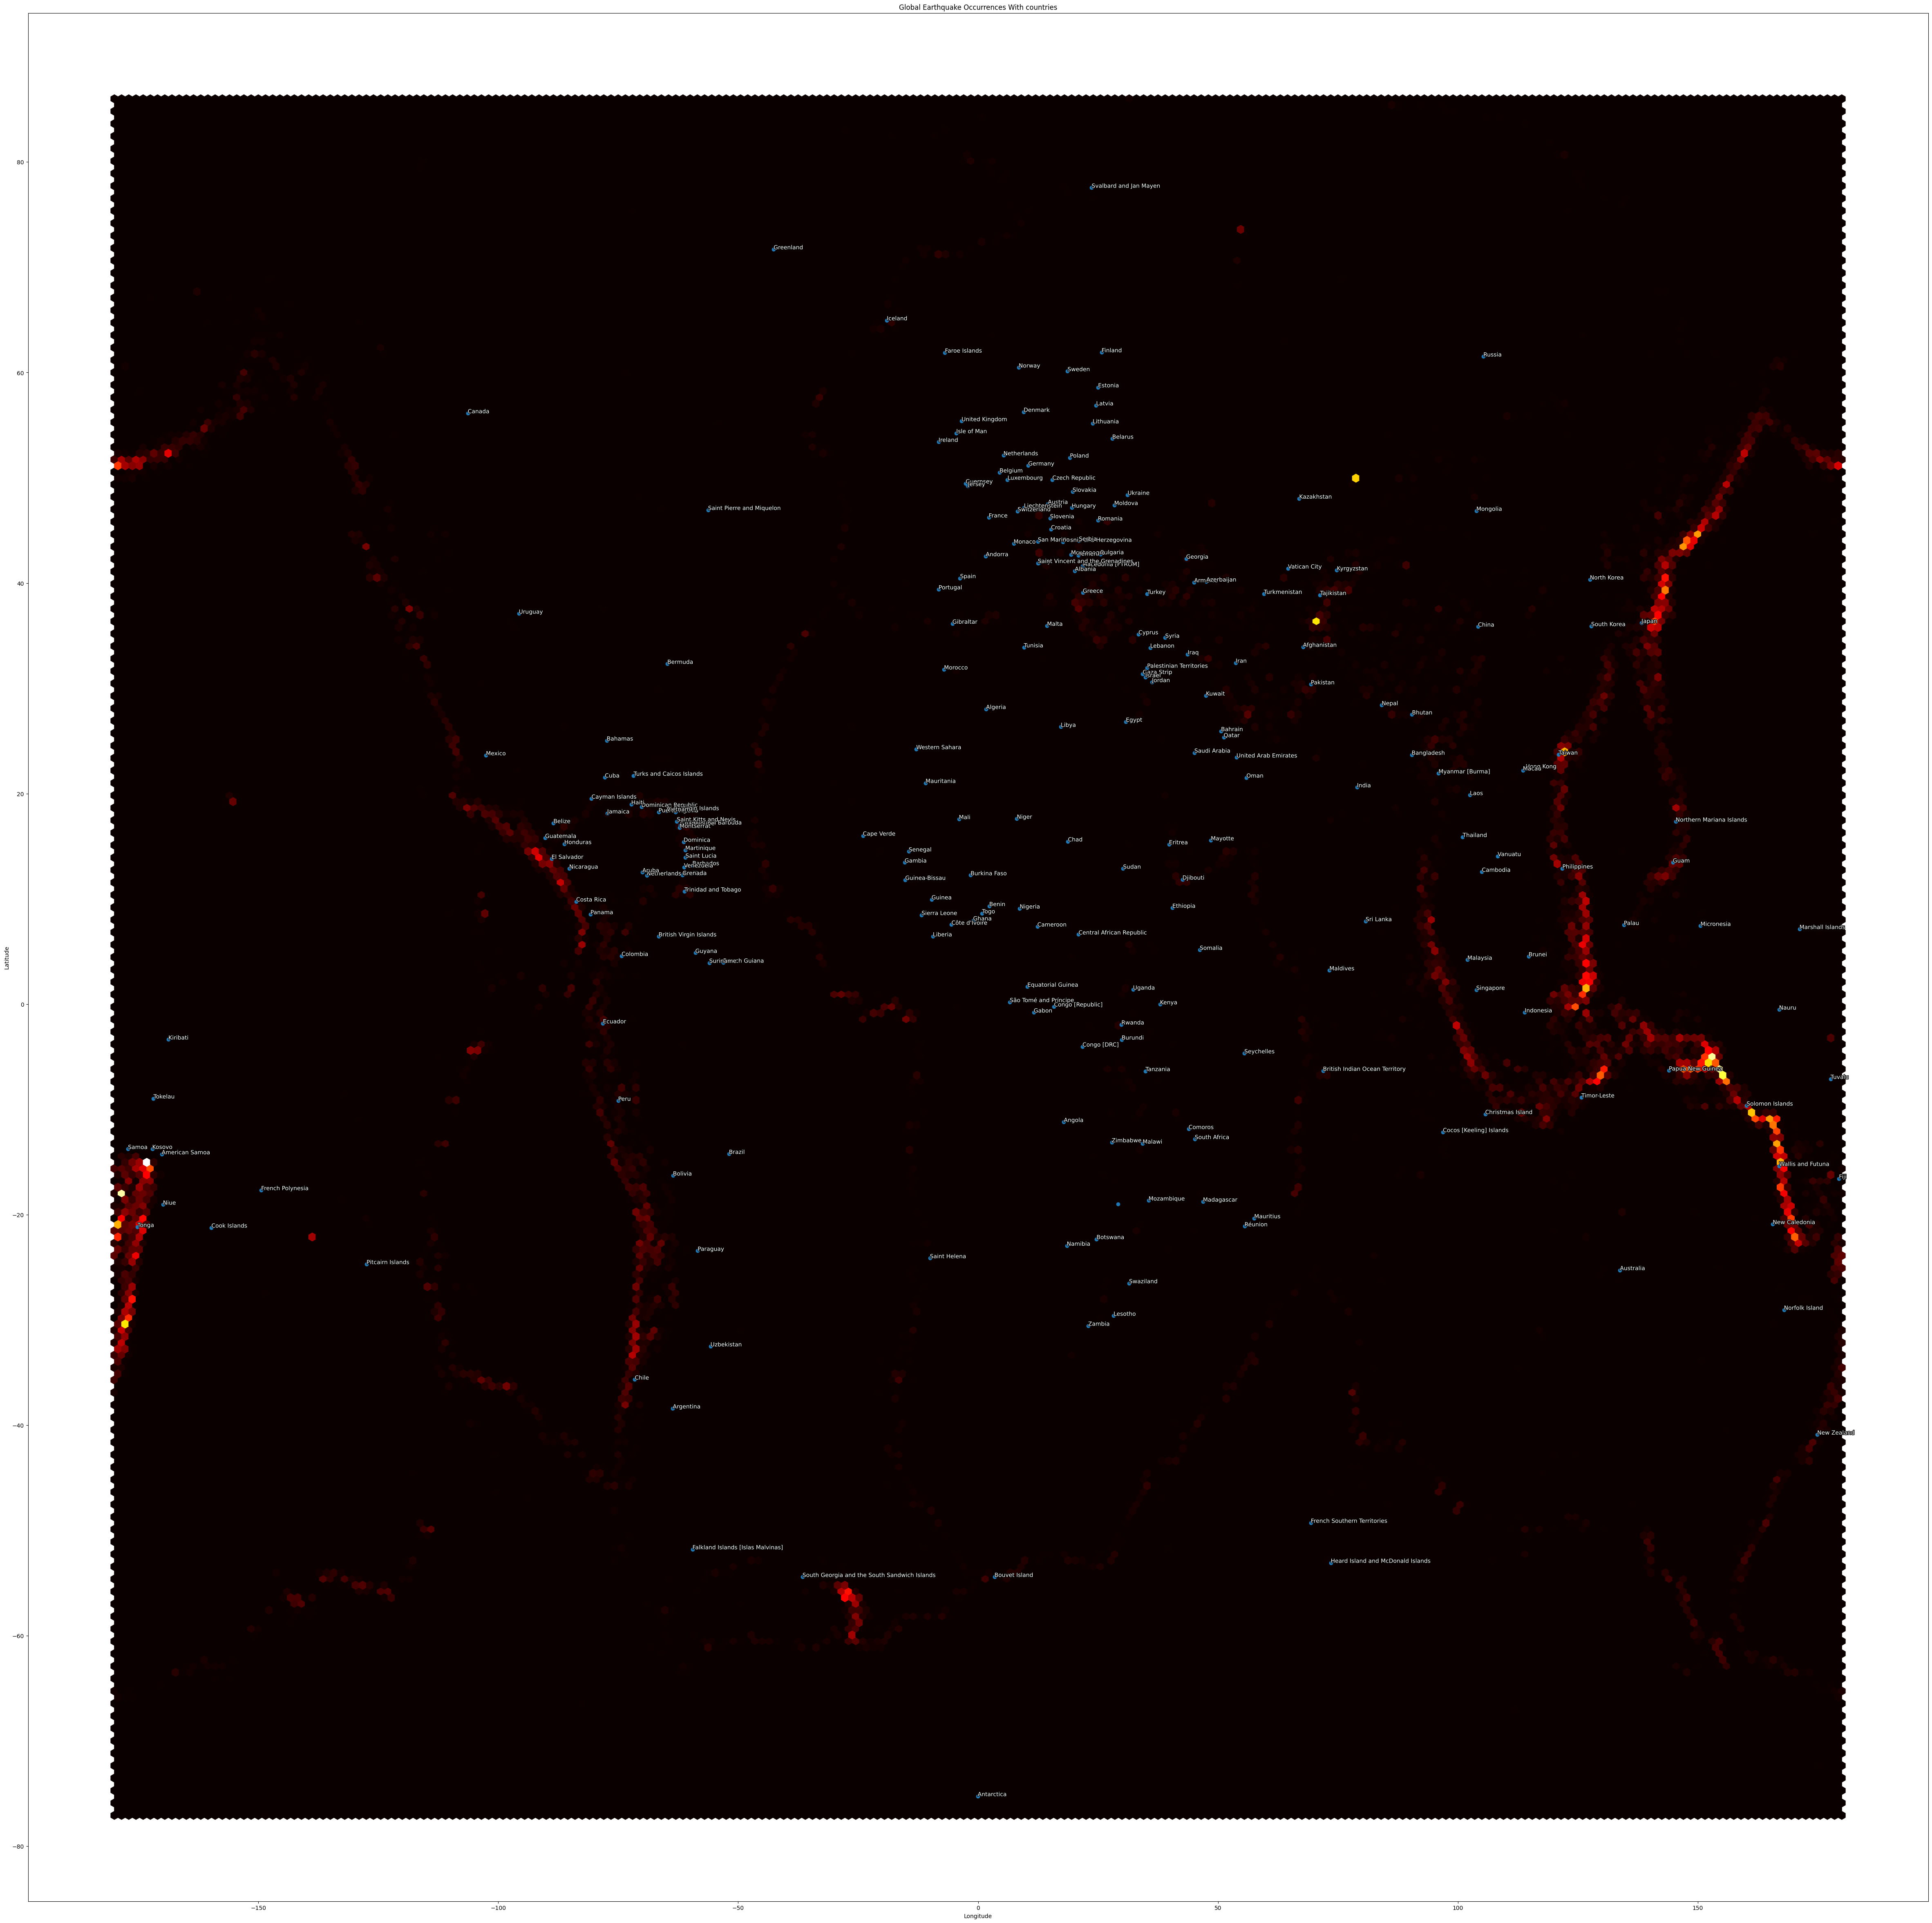

In [324]:
import matplotlib.patheffects as path_effects
plt.figure(figsize=(60, 60))
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Global Earthquake Occurrences With countries")
# viridis, plasma, inferno, magma, cividis, hot
plt.hexbin(eq_df.Longitude, eq_df.Latitude, gridsize=240, cmap="hot")

plt.scatter(ll_df.longitude, ll_df.latitude)

for i,country in enumerate(ll_df.country):
  try:
    text= plt.annotate(country, (ll_df.longitude[i], ll_df.latitude[i]))
    text.set_path_effects([path_effects.Stroke(linewidth=2, foreground="black"), path_effects.Normal()])
    text.set_color("white")
  except KeyError:
    pass

plt.show()